### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats

a = np.random.normal(20, 4, 15)
b = np.random.normal(20, 4, 15)
np.mean(a), np.mean(b)

(19.589705171563637, 18.32179959000695)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

No, a statistically significant difference can not be obeserved from the difference in mean alone.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

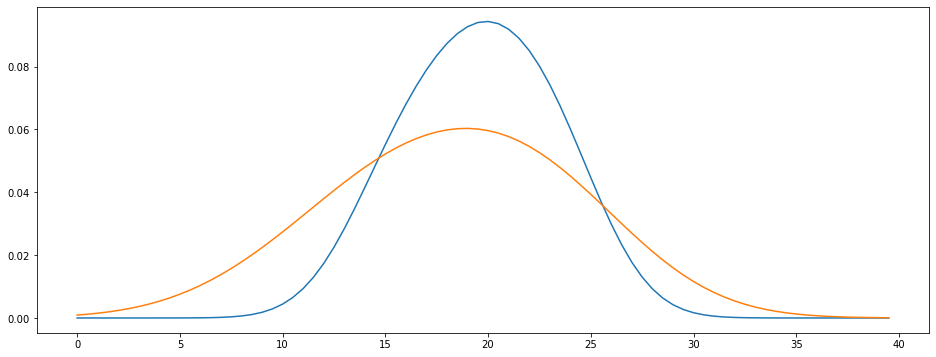

In [3]:
x_axis = np.arange(0,40,0.5)

kde_a = sp.stats.gaussian_kde(a, bw_method=0.8)
kde_b = sp.stats.gaussian_kde(b, bw_method=1)

x_densities_a = kde_a.evaluate(x_axis)
x_densities_b = kde_b.evaluate(x_axis)

plt.figure(figsize=(16,6))
plt.plot(x_axis, x_densities_a, label="dataset a")
plt.plot(x_axis, x_densities_b, label="dataset b")

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

No, a significant difference can not be visual observed from the graphs datasets.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [4]:
all_data = np.concatenate([a, b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a = all_data[:15]
    b = all_data[15:]

    means_difference.append(np.mean(a) - np.mean(b))

p = sum(means_difference >= (np.mean(a) - np.mean(b))) / len(means_difference)
print(f"Based on our p-value of {p}, there is no statistical significance difference.") 

Based on our p-value of 0.985, there is no statistical significance difference.


### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

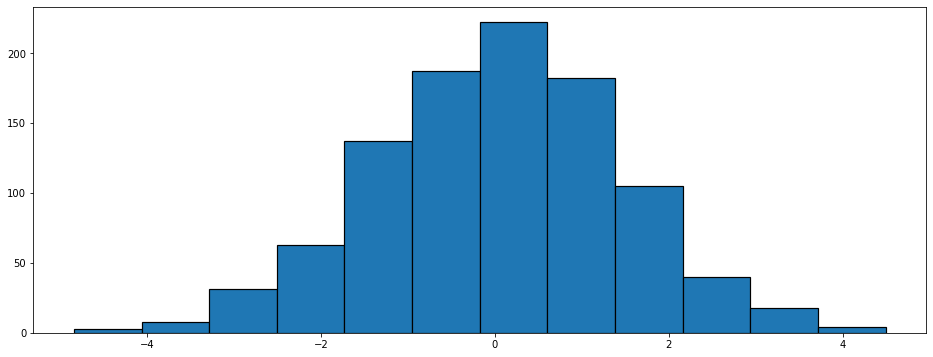

In [5]:
plt.figure(figsize=(16,6))
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)